In [1]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create x (features) and y (response)
X = iris.data
y = iris.target

In [3]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response values for the obervations in X
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

150

In [9]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print metrics.accuracy_score(y, y_pred)

0.96


In [11]:
# KNN(N=5)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X, y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)

0.966666666667


In [13]:
# KNN(N=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print metrics.accuracy_score(y, y_pred)

1.0


In [15]:
# Evalution procedure #2 Train/test split
# 1. Split the dataset into two pieces: a training set and a testing set
# 2. Train the model on the training set
# 3. Test the model on the testing set, and evaluate how well we did


# print the shape of X and y
print X.shape
print y.shape

(150, 4)
(150,)


In [16]:
# Step 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [18]:
# print the shapes of the new X objects
print X_train.shape
print X_test.shape

(90, 4)
(60, 4)


In [20]:
# print the shapes of the new y objects
print y_train.shape
print y_test.shape

(90,)
(60,)


In [22]:
# Step 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
# Step 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actuaal response values (y_test) with predicted response values (y_pred)
print metrics.accuracy_score(y_test, y_pred)

0.966666666667


In [26]:
# Repeat for KNN with K = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.966666666667


In [28]:
# Repeat for KNN with K = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred)

0.966666666667


In [54]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1,26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

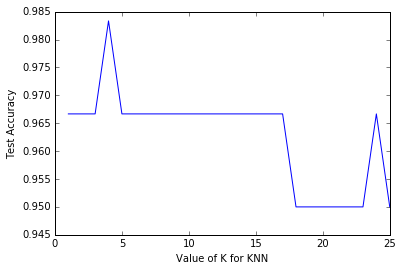

In [56]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Test Accuracy')